# Mathematical Concept of Linear Regression

In this notebook, we will cover the following topics:
- Need for Prediction
- Linear Model
- Linear Regression
- Parameter Estimators

## Need for Prediction

**Regression** is a method of investigating the functional relationships between variables.
- We have independent variables.
- We aim to estimate the value of the dependent variable given the independent variables.
- We seek a model, which in our case is the equation governing the relationship between these two variables.
- **Regression** is used when the variables are continuous and have some correlation.
- **Criterion**: Goodness of fit, which explains the quality of the model.


## Linear Model

We consider two variables:
- **$X$** is the independent variable or predictor.
- **$Y$** is the dependent variable.

We want to calculate **$Y$** from **$X$** using the equation:

> $Y = \beta_0 + \beta_1 X$

where:
- $\beta_1$ = slope, which equals $\frac{Y}{X}$
- $\beta_0$ = intercept, which is the value of $Y$ when $X = 0$.


## Linear Model with Noise

We consider an additional term for error or noise, $\epsilon$:

> $y = \beta_0 + \beta_1 X + \epsilon$

Given estimators for the model coefficients, we want to predict the future value of $Y$ using the relationship:

> $\hat{y} = \hat{\beta_0} + \hat{\beta_1} x$

where $\hat{y}$ is the predicted value of $Y$ given $X = x$.


## Building the Model

The process involves designing a line that fits through the points. The approach is to find a line that passes through the points such that the sum of the squared vertical distances between the points and the line is minimized.

Let's visualize this with a plot.

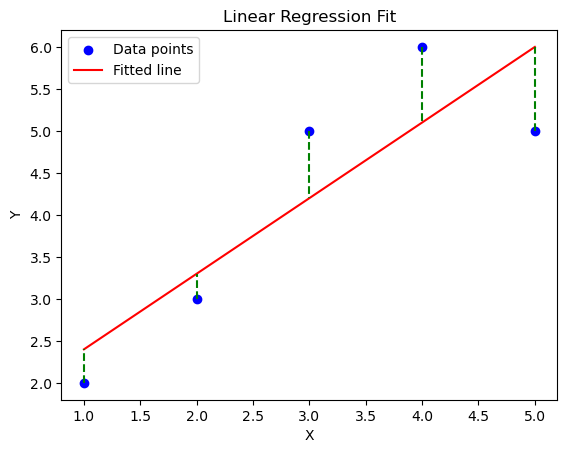

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Sample data
X = np.array([1, 2, 3, 4, 5])
Y = np.array([2, 3, 5, 6, 5])

# Plot the data points
plt.scatter(X, Y, color='blue', label='Data points')

# Fit a line using linear regression
coefficients = np.polyfit(X, Y, 1)
linear_regression_line = np.poly1d(coefficients)

# Plot the linear regression line
plt.plot(X, linear_regression_line(X), color='red', label='Fitted line')

# Plot vertical lines between data points and the fitted line
for x, y in zip(X, Y):
    plt.plot([x, x], [y, linear_regression_line(x)], color='green', linestyle='dashed')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Linear Regression Fit')
plt.legend()
plt.show()


## How to Estimate the Parameters?

The approach is straightforward if we consider the prediction of $Y$, denoted by $\hat{y_i}$, given the value $x_i$:

> $\hat{y_i} = \hat{\beta_0} + \hat{\beta_1} x_i$

Now consider the residual between the true value $y_i$ and the prediction $\hat{y_i}$:

> $e_i = y_i - \hat{y_i}$

The sum of squares of residuals (RSS) is then defined as:

> $\text{RSS} = e_1^2 + e_2^2 + \ldots + e_N^2$

**Objective**: Choose $\hat{\beta_0}$ and $\hat{\beta_1}$ to minimize RSS.


## Solutions

The estimators $\hat{\beta_0}$ and $\hat{\beta_1}$ are calculated as follows:

> $\hat{\beta_1} = \frac{\sum_{i=1}^{n} (x_i - \bar{x})(y_i - \bar{y})}{\sum_{i=1}^{n} (x_i - \bar{x})^2}$

> $\hat{\beta_0} = \bar{y} - \hat{\beta_1} \bar{x}$

where the sample means $\bar{y}$ and $\bar{x}$ are given by:

> $\bar{y} = \frac{1}{n} \sum_{i=1}^{n} y_i$

> $\bar{x} = \frac{1}{n} \sum_{i=1}^{n} x_i$


In [5]:
# Calculating the sample means
x_bar = np.mean(X)
y_bar = np.mean(Y)

# Calculating the estimators
beta_1_hat = np.sum((X - x_bar) * (Y - y_bar)) / np.sum((X - x_bar) ** 2)
beta_0_hat = y_bar - beta_1_hat * x_bar

print(f'Estimated coefficients:\nβ0: {beta_0_hat:.2f}\nβ1: {beta_1_hat:.2f}')


Estimated coefficients:
β0: 1.50
β1: 0.90


The calculated estimators are:

> $\hat{\beta_0} = \text{calculated value of } \beta_0$

> $\hat{\beta_1} = \text{calculated value of } \beta_1$

We can use these estimators to predict future values of $y$ given $x$.


For x = 6, predicted y = 6.90


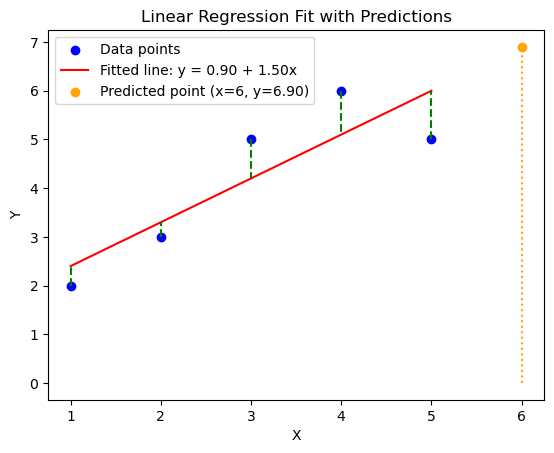

In [7]:
# Sample new data point for prediction
x_new = 6
y_pred = beta_0_hat + beta_1_hat * x_new

print(f'For x = {x_new}, predicted y = {y_pred:.2f}')

# Plot the data points and the regression line
plt.scatter(X, Y, color='blue', label='Data points')
plt.plot(X, linear_regression_line(X), color='red', label=f'Fitted line: y = {beta_0:.2f} + {beta_1:.2f}x')

# Plot vertical lines between data points and the fitted line
for x, y in zip(X, Y):
    plt.plot([x, x], [y, linear_regression_line(x)], color='green', linestyle='dashed')

# Highlight the new prediction
plt.scatter(x_new, y_pred, color='orange', label=f'Predicted point (x={x_new}, y={y_pred:.2f})')
plt.plot([x_new, x_new], [0, y_pred], color='orange', linestyle='dotted')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Linear Regression Fit with Predictions')
plt.legend()
plt.show()


## Line Fitting

### Best Model or Best Fit Line

- The best model or best fit line is the one that minimizes the sum of squared residuals.
- **Residuals** are the differences between the observed values and the predicted values.

### Result

- The equation of the fitted line becomes the predictor of $Y$.
- Note: A line can always be fitted to any set of points, but it might not necessarily be a good predictor.


In [8]:
# Residuals
residuals = Y - linear_regression_line(X)

# Sum of squared residuals (RSS)
RSS = np.sum(residuals ** 2)
print(f'Sum of squared residuals (RSS): {RSS:.2f}')

Sum of squared residuals (RSS): 2.70


## Goodness of Fit

### R-squared Measure

- **R-squared** measures the quality of the model.
- It indicates how well the points fit the line.
- Ranges between 0 and 1: the closer to 1, the better the model.

### Finding R-squared for Our Predictor

- R-squared is the criterion for model selection.
- The correlation between the independent variables $X$ and the dependent variable $Y$ determines how close R-squared is to 1.


In [10]:
# Calculate the Total Sum of Squares (TSS)
TSS = np.sum((Y - y_bar) ** 2)

# Calculate R-squared
R_squared = 1 - (RSS / TSS)
print(f'R-squared: {R_squared:.2f}')

R-squared: 0.75


## Summary

- The best fit line is determined by minimizing the sum of squared residuals.
- The goodness of fit is measured using R-squared.
- An R-squared value closer to 1 indicates a better model.
- The equation of the best fit line can be used to predict future values of $Y$.


## Multiple Regression

### Definition

- In multiple regression, more than one independent variable is used to predict the dependent variable:

> $Y = \beta_0 + \beta_1 X_1 + \ldots + \beta_n X_n$

- The process is the same as in the single variable case: finding the minimum distance.

### Importance

- Given multiple variables, they have different impacts on Y.
- The coefficients ($\beta_1, \beta_2, \ldots, \beta_n$) will have values according to the impact of each variable.


## Use of Linear Regression in Machine Learning

### Supervised Learning Approach

- Linear regression is a supervised learning approach.
- Used for predicting continuous data.
- Predictors $X$ and output $Y$ are provided as input.
- The data is analyzed (training) to find the equation linking $Y$ to $X$.
  - Coefficients $\beta$, Intercept $\beta_0$, and R-squared distance.